In [302]:
#import pandas library to be used
import pandas as pd
import matplotlib.pyplot as plt

# Fall 2021 Data Science Intern Challenge 

# Assumptions:
#Data set is as is and does not have any issues:
No issues such as formatting, lack of headers and incorrect data types, headers were verified in the excel spreadsheet

#All data in the imported set is valid for importation purposes.

#All order amount values are in the same currency.


#All shop_ids and user_ids have been entered correctly.

#Some tasks were performed outside of this python script, for information that was easily analysed from the google docs file, using excel formulas and sorting the data such as:

#Date range verification - all dates are in march of the same year.

#Some resources used to solve this problem:
#https://www.shopify.ca/blog/average-order-value
#https://www.optimizely.com/optimization-glossary/average-order-value/
#https://www.bigcommerce.ca/ecommerce-answers/what-average-order-value/

In [260]:
#define the list of the dataset from the google docs file
data_source = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/export?format=csv&gid=0"

#import data as a csv
data_set = pd.read_csv(data_source)

print("This is the data set being used:\n", data_set, "\n")

This is the data set being used:
       order_id  shop_id  user_id  order_amount  total_items payment_method  \
0            1       53      746           224            2           cash   
1            2       92      925            90            1           cash   
2            3       44      861           144            1           cash   
3            4       18      935           156            1    credit_card   
4            5       18      883           156            1    credit_card   
...        ...      ...      ...           ...          ...            ...   
4995      4996       73      993           330            2          debit   
4996      4997       48      789           234            2           cash   
4997      4998       56      867           351            3           cash   
4998      4999       60      825           354            2    credit_card   
4999      5000       44      734           288            2          debit   

               created_at  
0

#The above code shows that there are 5000 rows of data ant 7 columns, with the correct headers, verifying the data was imported correctly from the google docs file

In [266]:
#given the somewhat large data set, convert from a dictionary to data frame
data_set = pd.DataFrame(data_set)

In [268]:
#calculate an integer value for the number of rows (orders) in the data set to be used for future calculations
num_orders = len(data_set)

#calculate an integer value for the revenue
total_rev = sum(data_set.order_amount)

In [269]:
AOV = total_rev / num_orders
print("\nAOV =", AOV)



AOV = 3145.128


# Analysing the Data

#The average order value is verified to have been calculated correctly, with a rounded value of $3145, as in the problem defintion. With this, I can rule out the possibility of any arithmetic issues.

#However, it is known that there is an issue with the data (from the problem statement), so first thing to do is ensure the data is valid by analysing the relevant columns.
#The shop_ids and the user_ids are correct, so is the created_at date

#I will now check the following respectively:

#1. order_id: To ensure that they are unique

#2. price, using order_amount and total_items to calculate the unit price for analysis

#3. quantity of items ordered

#After this, I will recalculate the AOV and look at other values that can be used to measure the business growth, comparing them to the original data set and the corrected data set

# 1. Validating the order_ids

In [361]:
#1. Validating that the order_ids are unique
val_order_id_set = set(data_set.order_id)
if len(val_order_id_set) != len(data_set.order_id):
    print("\nDuplicates exist\n")
else: print("\nThere are not duplicates in the order_id\n")


There are not duplicates in the order_id



# 2. Analysing the price

In [362]:
#2. To analyse the price, I will breakdown the order_amount to unit_price
#This will tell me the price charged for a single shoe for each order
#allowing a better understanding of the data set

unit_price = data_set.order_amount / data_set.total_items

In [363]:
#update the data set to include the unit_cost
data_set['unit_price'] = unit_price

#Verify the data set
print("\nThis is the new data_set with the unit price of a shoe included:\n",data_set)


This is the new data_set with the unit price of a shoe included:
       order_id  shop_id  user_id  order_amount  total_items payment_method  \
0            1       53      746           224            2           cash   
1            2       92      925            90            1           cash   
2            3       44      861           144            1           cash   
3            4       18      935           156            1    credit_card   
4            5       18      883           156            1    credit_card   
...        ...      ...      ...           ...          ...            ...   
4995      4996       73      993           330            2          debit   
4996      4997       48      789           234            2           cash   
4997      4998       56      867           351            3           cash   
4998      4999       60      825           354            2    credit_card   
4999      5000       44      734           288            2          debit 

#The data set includes the unit price now.

#To visualise the data better (instead of going through each row) I will plot the unit_price against shop_id

#NOTE: In excel, I sorted by unit price and noticed there was an abnormally high unit price

#This plot here is to visualise the data for better understanding

<AxesSubplot:xlabel='shop_id', ylabel='unit_price'>

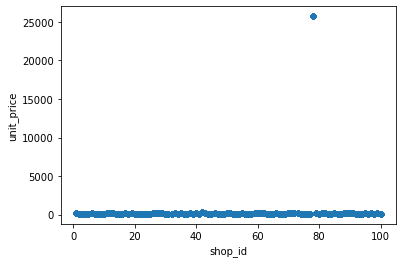

In [364]:
#Each shop, since selling only one model of shoe charges the same price for that shoe
#NOTE: I chose to plot the unit_price against the shop_id because there are only 100 shops
#giving me an independent variable with fixed values.

data_set.plot(x ='shop_id', y='unit_price', kind = 'scatter')

#From this plot, we can see that there is a single major outlier in the data set, where the price is about 25000 per unit (for a shoe).

#I will now filter for the shop_ids that have the unit price >20000 (using the data from the plot)
#and group them by unit_price and shop_id

In [365]:
unit_price_large = data_set.loc[data_set.unit_price > 20000]

unit_price_large_grouped = unit_price_large.groupby(["shop_id", "unit_price"])["shop_id"].count()
print(unit_price_large_grouped)

shop_id  unit_price
78       25725.0       46
Name: shop_id, dtype: int64


#From the data set grouped by unit price and shop id, it shows that the unit_price of 25725 appears to  be incorrect or a unique outlier
#This also corellates with the shop ID 78 only, showing that only this shop has the issue
#in the data set, which I will exclude for purposes of accuracy, given how large it is compared to the other values

#NOTE: This step assumes that the unit_price of 25725 is either incorrect - from a bug, from incorrect data entry or a unique outlier
#This high unit value would skew the results towards a higher AOV value, due to the relatively high revenue

<AxesSubplot:xlabel='shop_id', ylabel='unit_price'>

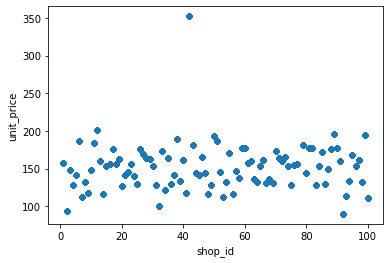

In [366]:
#Correcting the data set to exclude the outlier price.
data_set_corrected = data_set.loc[data_set.shop_id != 78]
data_set_corrected.plot(x ='shop_id', y='unit_price', kind = 'scatter')

#For further comparison, I will calculate the standaer deviation for the original data set and compare it to the corrected data set.

In [367]:
print('The original data unit_price has a standard deviation of:',data_set.std().unit_price,'\n'*2)
print('The corrected data unit_price has a standard deviation of:',data_set_corrected.std().unit_price,'\n'*2)

The original data unit_price has a standard deviation of: 2441.9637253684546 


The corrected data unit_price has a standard deviation of: 31.26021753289639 




#The corrected data set now appears more within reason

# 3. Analysing the quantity of shoes ordered

In [368]:
total_items_grouped = data_set_corrected.groupby(["total_items"])["total_items"].count()
print("\nData set grouped by the total items, counting how many times the same quantity of shoes were purchased:\n\n",total_items_grouped)

total_items_grouped = pd.DataFrame(total_items_grouped)
#total_items_grouped = total_items_grouped.rename(columns = {total_items:IT}, inplace = False)
#print("\nData set grouped by the total items, counting how many times the same quantity of shoes were purchased:\n\n",total_items_grouped)

#total_items_grouped.plot(x ='total_items', y='[total_items].count()', kind = 'scatter')
#print(len(total_items_grouped))
#total_items_groupedplt = data_set.groupby(["total_items"])["total_items"].plot(kind = 'scatter')



Data set grouped by the total items, counting how many times the same quantity of shoes were purchased:

 total_items
1       1811
2       1816
3        932
4        292
5         77
6          8
8          1
2000      17
Name: total_items, dtype: int64


#From this data, there appears to be a relatively large quantity of shoes (2000) ordered 17 times,
#when compared to the other number of orders ranging from 1 - 8, this data is clearly an outlier
#This may be a large retailer that buys a fixed amount of shoes with every purchace
#Analysing the date data did not show a trend in the order dates, but showed that they ordered the same quantity each time.
#I will plot the total_items against the unit price and shop id
#Note: I intuitively chose user_id here because the users are placing the orders
#I tested this plot with other values, such as unit_cost and shop_id and decided the user_id showed the data best

<AxesSubplot:xlabel='shop_id', ylabel='total_items'>

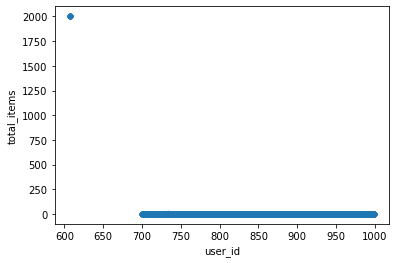

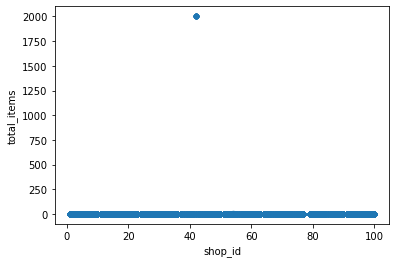

In [369]:
data_set_corrected.plot(x ='user_id', y='total_items', kind = 'scatter')
data_set_corrected.plot(x ='shop_id', y='total_items', kind = 'scatter')

In [370]:
#I will now exclude the data from the data set and group by the shop_id and user_id respectively
total_items_large = data_set_corrected.loc[data_set_corrected.total_items == 2000]

total_items_large_groupedu = total_items_large.groupby(["user_id"])["total_items"].count()
total_items_large_groupeds = total_items_large.groupby(["shop_id"])["total_items"].count()
total_items_large_groupedus = total_items_large.groupby(["user_id", "shop_id"])["total_items"].count()

print(total_items_large_groupedu,'\n')
print(total_items_large_groupeds,'\n')
print(total_items_large_groupedus,'\n')

user_id
607    17
Name: total_items, dtype: int64 

shop_id
42    17
Name: total_items, dtype: int64 

user_id  shop_id
607      42         17
Name: total_items, dtype: int64 



#Inspecting the data further in excel, looking at the total_items column, one thing to notice is the large total_items ordered come from a single shop ID 42, and user ID 607, 

#Given that all these orders were from a single store, it could be that these orders were made by a customer that regularly buys the same amount of shoes wholesale as previously mentioned

#It is important to note that this shop sold at other quantities to other customers, and only user 607 ordered such a large amount each time.

#thus using this customer to calculate the AOV or other groth tracking values (such as the modal value) will skew the data higher
#As such, I have decided to also exclude it from the data set.

#I will now filter for where the total_items ordered is 2000 exclude this data, which is also where user_id is 607

In [371]:
data_set_corrected2 = data_set_corrected.loc[data_set_corrected.user_id != 607]

#I will now compare the standard deviation of the total_items from the previous data set to this data set

In [376]:
print('The previous data total_items has a standard deviation of:',data_set_corrected.std().total_items,'\n'*2)
print('The corrected data total_items has a standard deviation of:',data_set_corrected2.std().total_items,'\n'*2)

The previous data total_items has a standard deviation of: 116.85728599309454 


The corrected data total_items has a standard deviation of: 0.9828207382187315 




#The standard deviation is much less after the data is corrected, this shows the closeness in values of the total items after the large total items has been excluded

#The AOV can now be calculated with this "incorrrect" data excluded

In [377]:
#recalculate the AOV
AOV_corrected2 = (sum(data_set_corrected2.iloc[:,3])) / len(data_set_corrected2)

print("""\nThe new AOV after the data has been cleaned up is:\n""", AOV_corrected2)



The new AOV after the data has been cleaned up is:
 302.58051448247926


#In summary, the issue with the data set appears to be abnormally high unit costs from a single shop, as well as abnormally high orders from a single customer.

# Supplimental analysis

#Below, is some analysis of the data sets at different levels show how the relationship between data changes as the data is cleaned up, using the mean, median and mode.

In [378]:
mean_data_set = data_set.mean(axis = 0)
median_data_set = data_set.median()
mode_data_set = data_set.mode()

print("From the original data set:\n")
print(f"""The mean of the order amount and total item columns respectively:
Mean order amount:\n{mean_data_set.order_amount}
\nMean total items ordered:\n{mean_data_set.total_items}\n""")

print(f"""\nThe median of the order amount and total item columns respectively:
\nMedian order amount:\n{median_data_set.order_amount}
\nMedian total items ordered:\n{median_data_set.total_items}\n""")

print(f"""\nThe mode of the order amount and total item columns respectively:
Mode order amount:\n{mode_data_set.order_amount[0]}
\nMode total items ordered:\n{mode_data_set.total_items[0]}\n""")

print('-'*30,'\n'*2)

mean_data_set_corrected = data_set_corrected.mean(axis = 0)
median_data_set_corrected = data_set_corrected.median(axis = 0)
mode_data_set_corrected = data_set_corrected.mode(axis = 0)

print("From the inital data correction, excluding only the high priced shoes of 25725\n")
print(f"""\nThe mean of the order amount and total item columns respectively:
Mean order amount:\n{mean_data_set_corrected.order_amount}
\nMean total items ordered:\n{mean_data_set_corrected.total_items}\n""")

print(f"""\nThe median of the order amount and total item columns respectively:
\nMedian order amount:\n{median_data_set_corrected.order_amount}
\nMedian total items ordered:\n{median_data_set_corrected.total_items}\n""")

print(f"""\nThe mode of the order amount and total item columns respectively:
Mode order amount:\n{mode_data_set_corrected.order_amount[0]}
\nMode total items ordered:\n{mode_data_set_corrected.total_items[0]}\n""")

print('-'*30,'\n'*2)
mean_data_set_corrected2 = data_set_corrected2.mean(axis = 0)
median_data_set_corrected2 = data_set_corrected2.median(axis = 0)
mode_data_set_corrected2 = data_set_corrected2.mode()

print("From the final data correction, excluding the high unit price of 25725, and high number items orderd, 2000:\n")

print(f"""\nThe mean of the order amount and total item columns respectively:
Mean order amount:\n{mean_data_set_corrected2.order_amount}
\nMean total items ordered:\n{mean_data_set_corrected2.total_items}\n""")

print(f"""\nThe median of the order amount and total item columns respectively:
\nMedian order amount:\n{median_data_set_corrected2.order_amount}
\nMedian total items ordered:\n{median_data_set_corrected2.total_items}\n""")

print(f"""\nThe mode of the order amount and total item columns respectively:
Mode order amount:\n{mode_data_set_corrected2.order_amount[0]}
\nMode total items ordered:\n{mode_data_set_corrected2.total_items[0]}\n""")


From the original data set:

The mean of the order amount and total item columns respectively:
Mean order amount:
3145.128

Mean total items ordered:
8.7872


The median of the order amount and total item columns respectively:

Median order amount:
284.0

Median total items ordered:
2.0


The mode of the order amount and total item columns respectively:
Mode order amount:
153.0

Mode total items ordered:
2.0

------------------------------ 


From the inital data correction, excluding only the high priced shoes of 25725


The mean of the order amount and total item columns respectively:
Mean order amount:
2717.3677836092047

Mean total items ordered:
8.851029471134437


The median of the order amount and total item columns respectively:

Median order amount:
284.0

Median total items ordered:
2.0


The mode of the order amount and total item columns respectively:
Mode order amount:
153.0

Mode total items ordered:
2.0

------------------------------ 


From the final data correction, e

#From the values above, the Mode and Median values remained the same regardless of the data set.

#This is because the outliers were much less than the total data set, as such did not affect the mode and median

#On the other hand, due to the way Mean is calculated, there is a vast difference in all 3 values

#For this data set, using the median or mode, without correcting the data will give fairly accurate results, while the mean would not.